In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew


In [48]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [49]:
############# Separate each participant's time-series into each trial. Remove NaN ###########

In [50]:
#print(len(speed))
print(len(curr_X[0]))

46556


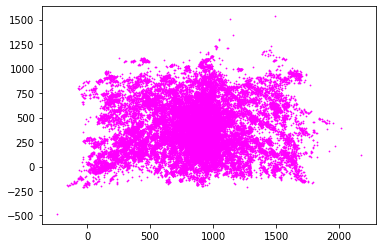

In [51]:
plt.scatter(curr_X, curr_Y,s=0.6,c='magenta')
plt.show()

In [52]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [53]:
x_val = test.iloc[:, 39:40].values
y_val = test.iloc[:, 40:41].values
f_type = test.iloc[:, 79:80].values

In [54]:
x_fix = []
y_fix = []

x_sac = []
y_sac = []

t_stamps = test.iloc[:, 0:1].values

#print(t_stamps)

sac_timestamp = []
fix_timestamp = []

leg = int(len(f_type))
print(leg)

for i in range (leg):
    if f_type[i] == 'Fixation':
        x_fix.append(x_val[i])
        y_fix.append(y_val[i])
        fix_timestamp.append(t_stamps[i])
        
    elif f_type[i] == 'Saccade':
        x_sac.append(x_val[i])
        y_sac.append(y_val[i])
        sac_timestamp.append(t_stamps[i])
        
    else:
        pass
    
print("X/Y Fixation Points")

#print(x_fix)
#print(y_fix)

print("X/Y Saccade Points")

#print(x_sac)
#print(y_sac)


        

46556
X/Y Fixation Points
X/Y Saccade Points


In [55]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

fix_duration_diff = []

#Print diff in timestamps for easy feature seperation

for i in range(len(fix_timestamp)-1):
    
    fix_duration_diff.append(fix_timestamp[i+1] - fix_timestamp[i])

#print(fix_duration_diff)
#print(len(fix_duration_diff))

# Feature Displacement

fix_point_disP = []  
x_point_fixLen = []
y_point_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_point_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_point_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_point_disP.append(np.sqrt(x_point_fixLen[i]**2 + y_point_fixLen[i]**2))

#Define boundaries for feature seperation (a certain amount of time needs to pass for a feature to be "ended")

fix_duration_lengths = []
fix_disp_lengths = []

fix_feat_disp = 0 

fix_count = 0
fix_duration_set = 0

for i in range (len(fix_duration_diff)):
    
    if (fix_duration_diff[i] < 100000):
        fix_count = fix_count + 1
        #count up individual lengths
        
        if (fix_duration_diff[i] < 0):
            pass
        else:
            fix_duration_set = fix_duration_set + fix_duration_diff[i]
            fix_feat_disp = fix_feat_disp + fix_point_disP[i]
    
        #print(fix_duration_diff[i])
        
    else:
        
        if (fix_count <= 1):
            #discard
            #print(fix_count)
            fix_count = 0 #reset
            fix_duration_set = 0
            fix_feat_disp = 0
            
        else:
            #append
            #print(fix_count)
            fix_duration_lengths.append(fix_duration_set)
            fix_duration_set = 0
            fix_disp_lengths.append(fix_feat_disp)
            fix_feat_disp = 0
            fix_count = 0 #reset 
            

        
#print(count)
    
#print(len(fix_duration_lengths))

#print(fix_duration_lengths)

#When features "transition" or "end", append total time of that feature (sum of the time differences for each point in a fixation or saccade group)
    #Note: you may have to delete the first summation (deduct first point from itself)
    #A counter will be necessary to "reset" fixations, or omit singular isolated points classified as fixations
    
#Plot hisogram of each list, with their contained feature durations

#print(fix_duration_lengths)

Timestamps


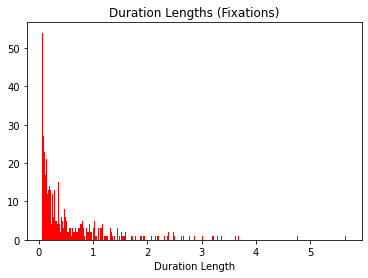

Average Duration: [0.55650237] Seconds
Standard Deviation: 0.7180343431281303
Skewness: 2.8705385406674657
Kurtosis: 11.108562189618569


In [56]:
plt.hist(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),300,color="red")
plt.xlabel("Duration Length")
plt.title("Duration Lengths (Fixations)")
plt.savefig("Fixation_feat_dur_hist")
plt.show()

f_dur_tot = 0

for j in range (len(fix_duration_lengths)):
    
    if math.isnan(fix_duration_lengths[j]):
        pass
    else:
        f_dur_tot = f_dur_tot + fix_duration_lengths[j]
    
f_dur_avg = f_dur_tot/len(fix_duration_lengths)

print("Average Duration: " + str(f_dur_avg/1000000) + " Seconds")

#calculate also standard deviation, skewness and kurtosis

f_d_sd = np.std(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1))
print("Standard Deviation: " + str(f_d_sd))

f_d_sk = skew(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Skewness: " + str(f_d_sk))

f_d_ku = kurtosis(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Kurtosis: " + str(f_d_ku))

In [57]:
print("Timestamps")
#print(sac_timestamp)

sac_duration_diff = []

for i in range(len(sac_timestamp)-1):
    
    sac_duration_diff.append(sac_timestamp[i+1] - sac_timestamp[i])
    
#print(sac_duration_diff)
#print(len(sac_duration_diff))


sac_point_disP = []  
x_point_sacLen = []
y_point_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_point_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_point_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_point_disP.append(np.sqrt(x_point_sacLen[i]**2 + y_point_sacLen[i]**2))



sac_duration_lengths = []
sac_disp_lengths = []

sac_feat_disp = 0 

sac_count = 0
sac_duration_set = 0

for i in range (len(sac_duration_diff)):
    
    if (sac_duration_diff[i] < 100000):
        sac_count = sac_count + 1
        #count up individual lengths
        
        if (sac_duration_diff[i] < 0):
            pass
        else:
            sac_duration_set = sac_duration_set + sac_duration_diff[i]
            sac_feat_disp = sac_feat_disp + sac_point_disP[i]
        #print(sac_duration_diff[i])
        
    else:
        
        if (sac_count <= 1):
            #discard
            sac_count = 0 #reset
            sac_duration_set = 0 
            sac_feat_disp = 0
            
        else:
            sac_duration_lengths.append(sac_duration_set)
            sac_duration_set = 0
            sac_disp_lengths.append(sac_feat_disp)
            sac_feat_disp = 0
            sac_count = 0 #reset 


#print(len(sac_duration_lengths))            

#print(sac_duration_lengths)

Timestamps


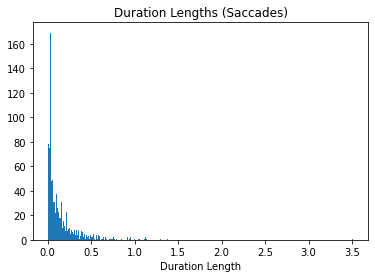

Average Duration: [0.15313909] Seconds
Standard Deviation: 0.22266501749754422
Skewness: 5.640883967514786
Kurtosis: 63.083178703324705


In [58]:
plt.hist(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),300)
plt.xlabel("Duration Length")
plt.title("Duration Lengths (Saccades)")
plt.savefig("Saccades_feat_dur_hist")
plt.show()

s_dur_tot = 0

for j in range (len(sac_duration_lengths)):
    
    if math.isnan(sac_duration_lengths[j]):
        pass
    else:
        s_dur_tot = s_dur_tot + sac_duration_lengths[j]
    
s_dur_avg = s_dur_tot/len(sac_duration_lengths)

print("Average Duration: " + str(s_dur_avg/1000000) + " Seconds")
#calculate also standard deviation, skewness and kurtosis

s_d_sd = np.std(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1))
print("Standard Deviation: " + str(s_d_sd))

s_d_sk = skew(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Skewness: " + str(s_d_sk))

s_d_ku = kurtosis(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Kurtosis: " + str(s_d_ku))

In [59]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

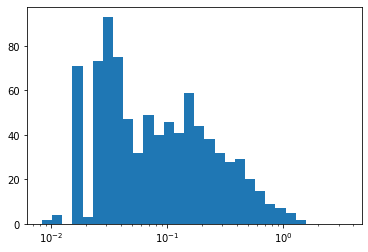

In [60]:
plot_loghist((np.array(sac_duration_lengths)/1000000).sum(axis=1),30)

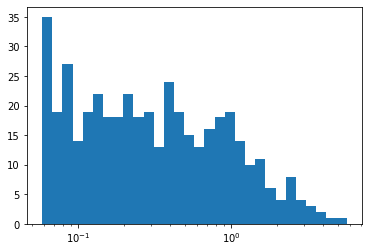

In [61]:
plot_loghist((np.array(fix_duration_lengths)/1000000).sum(axis=1),30)

In [62]:
print(len(sac_duration_lengths))
print(len(sac_disp_lengths))

#Write velocity algo with these instead

865
865


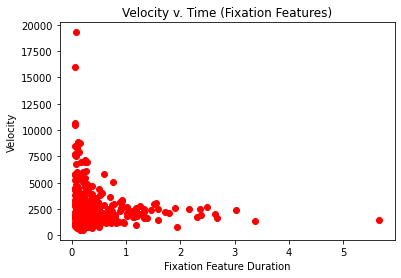

In [63]:
    
fix_feat_velo = []
    
for i in range(len(fix_disp_lengths)):
        
    fix_feat_velo.append(fix_disp_lengths[i]/(fix_duration_lengths[i]/1000000))


plt.scatter(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),fix_feat_velo, c = 'red')
plt.xlabel("Fixation Feature Duration")
#plt.xlim(0, 1000000)
#plt.ylim(0, 0.07)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Fixation Features)")
plt.savefig("Fixations_feat_velo")
plt.show()


In [64]:
#there are points missing here, it seems. --not clear why--

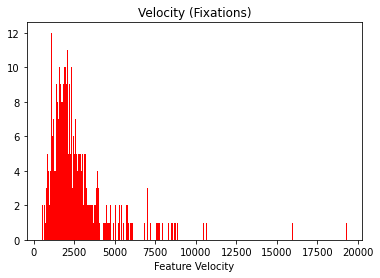

In [65]:
plt.hist(np.array(fix_feat_velo).sum(axis=1),300,color="red")
plt.xlabel("Feature Velocity")
plt.title("Velocity (Fixations)")
plt.savefig("Fixations_feat_velo_hist")
plt.show()

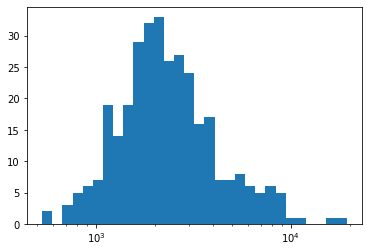

In [66]:
plot_loghist(np.array(fix_feat_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(fix_feat_velo).sum(axis=1)))],30)

In [67]:
#nothing relevant to see here

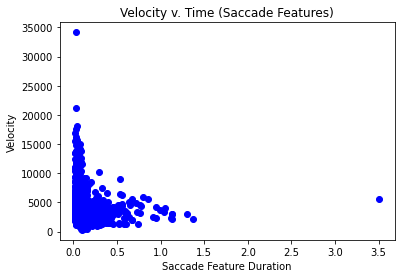

In [68]:
sac_feat_velo = []
    
for i in range(len(sac_disp_lengths)):
        
    sac_feat_velo.append(sac_disp_lengths[i]/(sac_duration_lengths[i]/1000000))


plt.scatter(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),sac_feat_velo, c = 'blue')
plt.xlabel("Saccade Feature Duration")
#plt.xlim(0, 1000000)
#plt.ylim(0, 0.07)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Saccade Features)")
plt.savefig("Saccades_feat_velo")
plt.show()

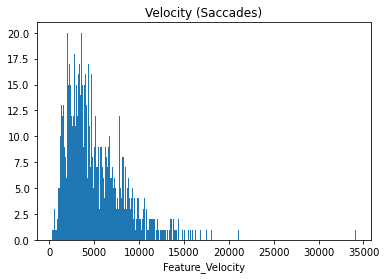

In [69]:
plt.hist(np.array(sac_feat_velo).sum(axis=1),300)
plt.xlabel("Feature_Velocity")
plt.title("Velocity (Saccades)")
plt.savefig("Saccades_feat_velo_hist")
plt.show()

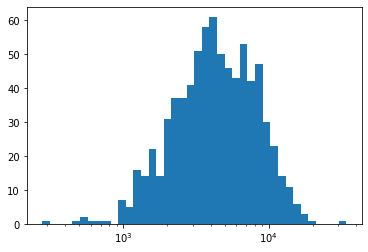

In [70]:
plot_loghist(np.array(sac_feat_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(sac_feat_velo).sum(axis=1)))],40)

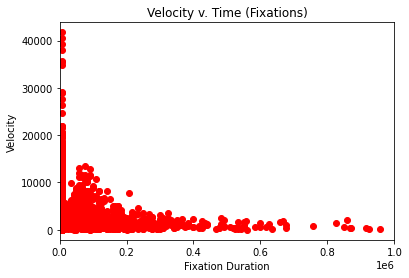

In [71]:
#Displacement

fix_disP = []  
x_fixLen = []
y_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_disP.append(np.sqrt(x_fixLen[i]**2 + y_fixLen[i]**2))
    
    
#Velocity

fix_time_delta = []
    
fix_velo = []
    
for i in range(len(fix_timestamp)-1):
    
    fix_time_delta.append(fix_timestamp[i+1] - fix_timestamp[i])
        
    fix_velo.append(fix_disP[i]/(fix_time_delta[i]/1000000))


plt.scatter(fix_time_delta,fix_velo, c = 'red')
plt.xlabel("Fixation Duration")
plt.xlim(0, 1000000)
#plt.ylim(0, 0.07)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Fixations)")
plt.savefig("Fixations_velo")
plt.show()


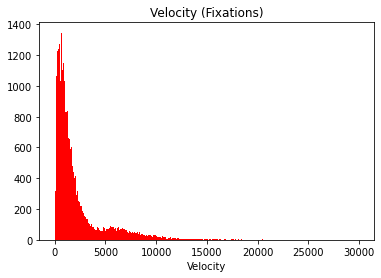

Standard Deviation: 2921.7197944455547
Skewness: 0.004793718051918759
Kurtosis: 10.246124387640068


In [72]:
plt.hist(np.array(fix_velo).sum(axis=1),300,color="red",range=[0,30000])
plt.xlabel("Velocity")
plt.title("Velocity (Fixations)")
plt.savefig("Fixations_velo_hist")
plt.show()


f_v_sd = np.std(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))]))
print("Standard Deviation: " + str(f_v_sd))

f_v_sk = skew(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Skewness: " + str(f_v_sk))

f_v_ku = kurtosis(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_v_ku))

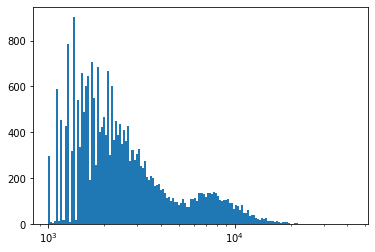

In [73]:
plot_loghist(np.abs(np.array(fix_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(fix_velo).sum(axis=1)))])+1000, bins=150)

In [74]:
#is this an indications that velocity based algorithms would be useful here

In [75]:
#bins[0]

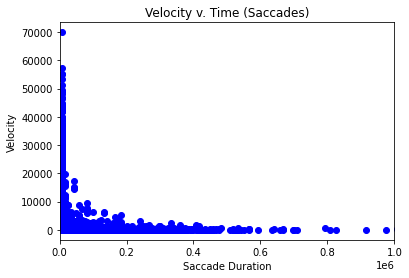

In [76]:
#Displacement

sac_disP = []  
x_sacLen = []
y_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_disP.append(np.sqrt(x_sacLen[i]**2 + y_sacLen[i]**2))

    
#Velocity

sac_time_delta = []
    
sac_velo = []
    
for i in range(len(sac_timestamp)-1):
    
    sac_time_delta.append(sac_timestamp[i+1] - sac_timestamp[i])
        
    sac_velo.append(sac_disP[i]/(sac_time_delta[i]/1000000))


plt.scatter(sac_time_delta,sac_velo, c = 'blue')
plt.xlim(0, 1000000)
#plt.ylim(1, 0.01)
plt.xlabel("Saccade Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Saccades)")
plt.savefig("Saccades_velo")
plt.show()


In [77]:
print(len(sac_velo))
sac_timestamp.pop(0)
print(len(sac_timestamp))

9970
9970


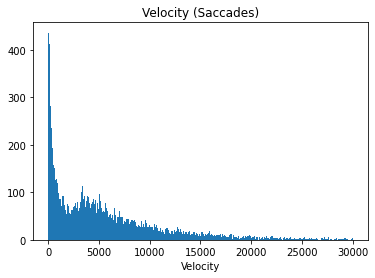

Standard Deviation: 7821.842029298082
Skewness: -0.0711165790563282
Kurtosis: 4.317204373940604


In [78]:
plt.hist(np.array(sac_velo).sum(axis=1),300,range=[0,30000])
plt.xlabel("Velocity")
plt.title("Velocity (Saccades)")
plt.savefig("Saccades_velo_hist")
plt.show()


s_v_sd = np.std(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))]))
print("Standard Deviation: " + str(s_v_sd))

s_v_sk = skew(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Skewness: " + str(s_v_sk))

s_v_ku = kurtosis(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(s_v_ku))

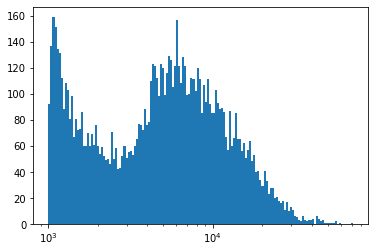

In [79]:
plot_loghist(np.abs(np.array(sac_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(sac_velo).sum(axis=1)))])+1000, bins=150)

In [81]:
print(len(fix_velo))
fix_timestamp.pop(0)
print(len(fix_timestamp))

26703
26703


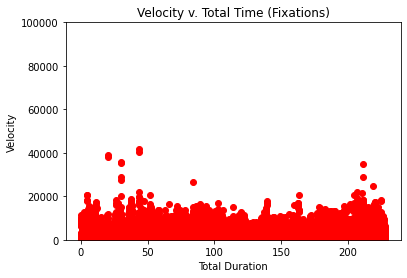

Average Velocity: [1986.05125866]


In [82]:
plt.scatter(np.array(np.array(fix_timestamp)/1000000).sum(axis=1),fix_velo, c = 'red')
plt.ylim(0, 100000)
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Fixations)")
plt.savefig("Fixations_velo_tottime")
plt.show()

f_velo_tot = 0

for j in range (len(fix_velo)):
    
    if math.isnan(fix_velo[j]):
        pass
    else:
        f_velo_tot = f_velo_tot + fix_velo[j]
    
f_velo_avg = f_velo_tot/len(fix_velo)

print("Average Velocity: " + str(f_velo_avg))

In [83]:
print(len(fix_velo))
#sac_timestamp.pop(0)
print(len(fix_timestamp))

26703
26703


In [84]:
print(len(sac_timestamp))
print(len(sac_velo))

9970
9970


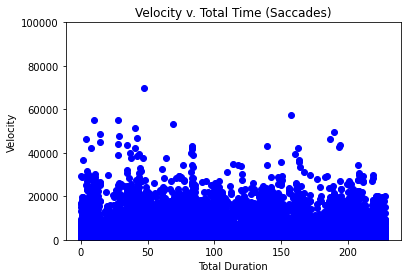

Average Velocity: [5365.77748468]


In [85]:
plt.scatter(np.array(np.array(sac_timestamp)/1000000).sum(axis=1),sac_velo, c = 'blue')
#plt.xlim(0, 20000)
plt.ylim(0, 100000)
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Saccades)")
plt.savefig("Saccades_velo_tottime")
plt.show()

s_velo_tot = 0

for j in range (len(sac_velo)):
    
    if math.isnan(sac_velo[j]):
        pass
    else:
        s_velo_tot = s_velo_tot + sac_velo[j]
    
s_velo_avg = s_velo_tot/len(sac_velo)

print("Average Velocity: " + str(s_velo_avg))

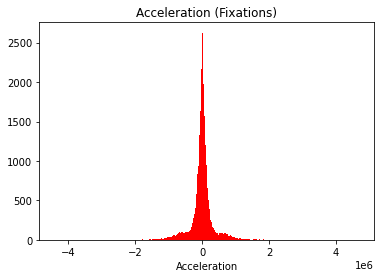

In [92]:
#Accelerattion
    
fix_accel = []

fa_timestamp = []

fix_velo_delta = []

fa_timestamp_new = []

for i in range(len(fix_timestamp)-1):
    
    fa_timestamp.append((fix_timestamp[i+1]/1000000) - (fix_timestamp[i]/1000000))
    
    
for i in range(len(fix_velo)-1):
        
    fix_velo_delta.append(fix_velo[i+1] - fix_velo[i])
    
    if (fix_disP[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        fix_accel.append(fix_velo_delta[i]/fa_timestamp[i]) # change fix_disP by time
        fa_timestamp_new.append(fa_timestamp[i])
    

#print(fix_accel)

plt.hist(np.array(np.array(fix_accel)).sum(axis=1),300,color="red")
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixations)")
plt.savefig("Fixations_accel_hist_v2")
plt.show()


In [87]:
fix_velo[0] - fix_velo[10]

array([-7052.11222287])

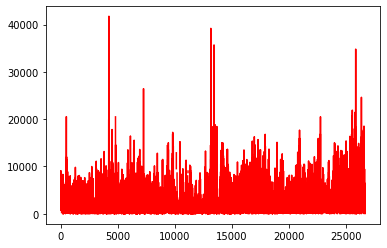

In [88]:
plt.plot(fix_velo,color="red")
a = np.diff(fix_velo)

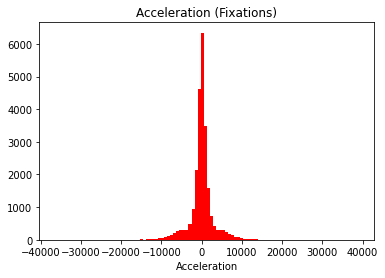

Standard Deviation: 2921.7197944455547
Skewness: 0.004793718051918759
Kurtosis: 10.246124387640068


In [89]:
c = plt.hist(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))]),100,color="red")
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixations)")
plt.savefig("Fixations_alt_accel_hist_v2")
plt.show()
#divide by time

#fix
f_a_sd = np.std(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))]))
print("Standard Deviation: " + str(f_a_sd))

f_a_sk = skew(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Skewness: " + str(f_a_sk))

f_a_ku = kurtosis(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_a_ku))

In [94]:
#Run this first

print(len(fa_timestamp_new))
print(len(fix_accel))

26409
26409


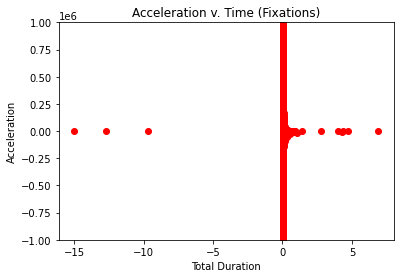

Average Acceleration: [-2698.14332042]


In [96]:
plt.scatter(fa_timestamp_new,fix_accel, c = 'red')
#plt.xlim(0, 20000)
plt.ylim(-1000000, 1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Fixations)")
plt.savefig("Fixations_accel_v2")
plt.show()

f_accel_tot = 0

for j in range (len(fix_accel)):
    
    if math.isnan(fix_accel[j]):
        pass
    else:
        f_accel_tot = f_accel_tot + fix_accel[j]
    
f_accel_avg = f_accel_tot/len(fix_accel)

print("Average Acceleration: " + str(f_accel_avg))

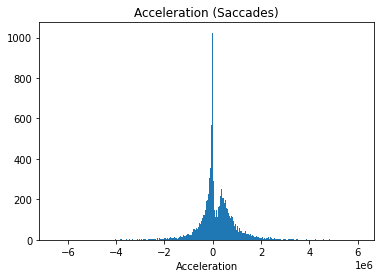

In [97]:
#Accelerattion
    
sac_accel = []

sa_timestamp = []

sac_velo_delta = []

sa_timestamp_new = []


for i in range(len(sac_timestamp)-1):
    
    sa_timestamp.append((sac_timestamp[i+1]/1000000) - (sac_timestamp[i]/1000000))

    
for i in range(len(sac_velo)-1):
        
    sac_velo_delta.append(sac_velo[i+1] - sac_velo[i])
    
    if (sac_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        sac_accel.append(sac_velo_delta[i]/sa_timestamp[i]) # change fix_disP by time
        sa_timestamp_new.append(sa_timestamp[i])
            


plt.hist(np.array(np.array(sac_accel)).sum(axis=1),300)
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades)")
plt.savefig("Saccades_accel_hist_v2")
plt.show()


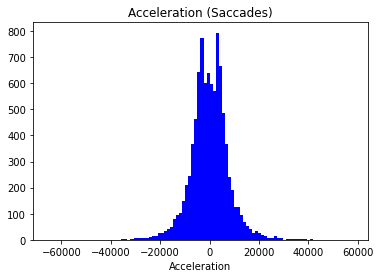

Standard Deviation: 7821.842029298082
Skewness: -0.0711165790563282
Kurtosis: 4.317204373940604


In [100]:
c = plt.hist(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))]),100,color="blue")
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades)")
plt.savefig("Saccades_alt_accel_hist_v2")
plt.show()
#divide by time


s_a_sd = np.std(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))]))
print("Standard Deviation: " + str(s_a_sd))

s_a_sk = skew(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Skewness: " + str(s_a_sk))

s_a_ku = kurtosis(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(s_a_ku))

In [102]:
#Run this first

sac_timestamp.pop(-1)
print(len(sac_timestamp))
print(len(sac_accel))

9969
9969


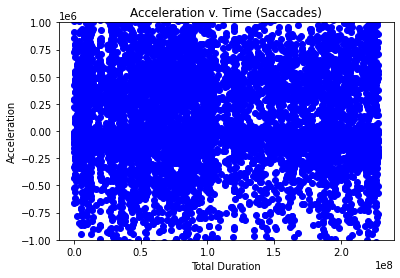

Average Acceleration: [134862.30430447]


In [103]:
plt.scatter(sac_timestamp,sac_accel, c = 'blue')
#plt.xlim(0, 20000)
plt.ylim(-1000000, 1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Saccades)")
plt.savefig("Saccades_accel_v2")
plt.show()

s_accel_tot = 0

for j in range (len(sac_accel)):
    
    if math.isnan(sac_accel[j]):
        pass
    else:
        s_accel_tot = s_accel_tot + sac_accel[j]
    
s_accel_avg = s_accel_tot/len(sac_accel)

print("Average Acceleration: " + str(s_accel_avg))

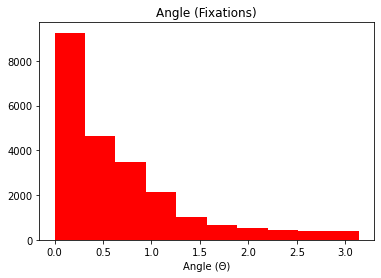

In [78]:
#Angle
    
fix_theta = []

f_numer = []

f_denom = []

ang_time_f = []
    
for i in range(len(fix_disP)-1): 
    
    top = (x_fixLen[i+1] * y_fixLen[i]) + (x_fixLen[i+1] * y_fixLen[i+1])
    
    if math.isnan(top):
        pass
    else:
        f_numer.append(top)
    
    bottom = (fix_disP[i] * fix_disP[i+1])
    
    if math.isnan(bottom):
        pass
    else:
        f_denom.append(bottom)
    
for j in range(len(f_numer)):
    
    #print(numer[j]/denom[j])
    if (f_denom[j] == 0):
        pass
    else:
        fix_cos = math.cos(f_numer[j]/f_denom[j])
        fix_theta.append(math.acos(fix_cos))
        ang_time_f.append(fix_timestamp[j+1]/1000000)

plt.hist(fix_theta,  color = "red")
plt.xlabel("Angle (Θ)")
plt.title("Angle (Fixations)")
plt.savefig("Fixations_angle_hist")
plt.show()    


In [43]:
print(len(ang_time_f))
print(len(fix_theta))

22945
22945


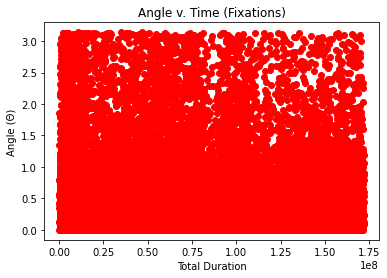

Average Angle: 0.6549301995968863 rad


In [44]:
plt.scatter(ang_time_f,fix_theta, c = 'red')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Fixations)")
plt.savefig("Fixations_angle")
plt.show()

f_theta_tot = 0

for j in range (len(fix_theta)):
    
    if math.isnan(fix_theta[j]):
        pass
    else:
        f_theta_tot = f_theta_tot + fix_theta[j]
    
f_theta_avg = f_theta_tot/len(fix_theta)

print("Average Angle: " + str(f_theta_avg) + " rad")

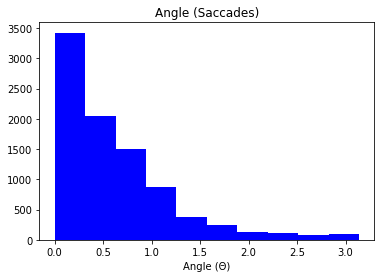

In [79]:
#Angle
    
sac_theta = []

s_numer = []

s_denom = []

ang_time_s = []
    
for i in range(len(sac_disP)-1): 
    
    top = (x_sacLen[i+1] * y_sacLen[i]) + (x_sacLen[i+1] * y_sacLen[i+1])
    
    if math.isnan(top):
        pass
    else:
        s_numer.append(top)
    
    bottom = (sac_disP[i] * sac_disP[i+1])
    
    if math.isnan(bottom):
        pass
    else:
        s_denom.append(bottom)
    
for j in range(len(s_numer)):
    
    #print(numer[j]/denom[j])
    if (s_denom[j] == 0):
        pass
    else:
        sac_cos = math.cos(s_numer[j]/s_denom[j])
        sac_theta.append(math.acos(sac_cos))
        ang_time_s.append(fix_timestamp[j+1]/1000000)
    
plt.hist(sac_theta, color = "blue")
plt.xlabel("Angle (Θ)")
plt.title("Angle (Saccades)")
plt.savefig("Saccades_angle_hist")
plt.show()    


In [33]:
print(len(ang_time_s))
print(len(sac_theta))

471
471


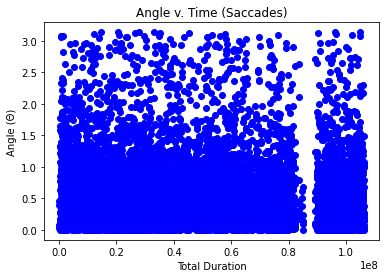

Average Angle: 0.6147756020357722 rad


In [46]:
plt.scatter(ang_time_s,sac_theta, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Saccades)")
plt.savefig("Saccades_angle")
plt.show()

s_theta_tot = 0

for j in range (len(sac_theta)):
    
    if math.isnan(sac_theta[j]):
        pass
    else:
        s_theta_tot = s_theta_tot + sac_theta[j]
    
s_theta_avg = s_theta_tot/len(sac_theta)

print("Average Angle: " + str(s_theta_avg) + " rad")

In [48]:
for i in range(1101):
    sac_velo.pop(0)
print(len(sac_velo))
print(len(sac_theta))

for i in range(3758):
    fix_velo.pop(0)
print(len(fix_velo))
print(len(fix_theta))

8869
8869
22945
22945


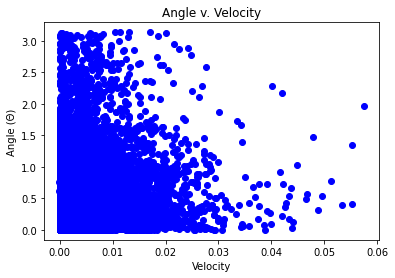

In [49]:
plt.scatter(sac_velo,sac_theta, c = 'blue')
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Sac")
plt.show()

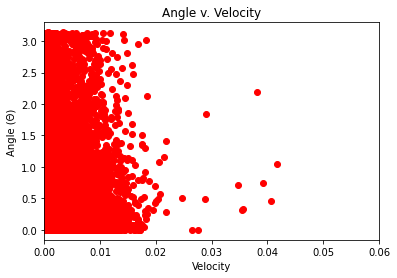

In [58]:
plt.scatter(fix_velo,fix_theta, c = 'red')
plt.xlim(0,0.06)
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Fix")
plt.show()

In [52]:
for i in range(1100):
    sac_accel.pop(0)
print(len(sac_accel))
print(len(sac_theta))

for i in range(3750):
    fix_accel.pop(0)
print(len(fix_accel))
print(len(fix_theta))

8869
8869
22945
22945


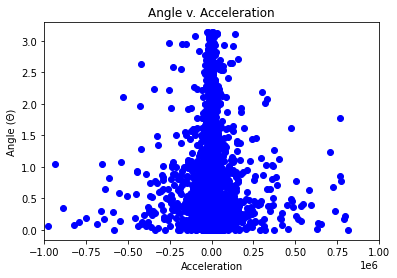

In [55]:
plt.scatter(sac_accel,sac_theta, c = 'blue')
plt.xlim(-1000000,1000000)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Sac")
plt.show()

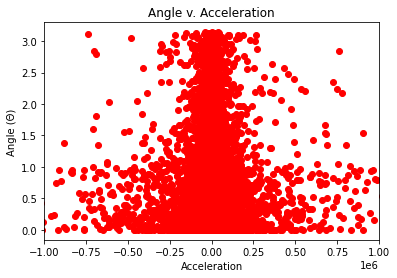

In [56]:
plt.scatter(fix_accel,fix_theta, c = 'red')
plt.xlim(-1000000,1000000)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Fix")
plt.show()

In [57]:
print(len(sac_accel))
print(len(sac_velo))
#sac_velo.pop(0)
print(len(fix_accel))
print(len(fix_velo))

#for i in range(6):
    #fix_velo.pop(0)
    
print(len(fix_velo))

8869
8869
22945
22945
22945


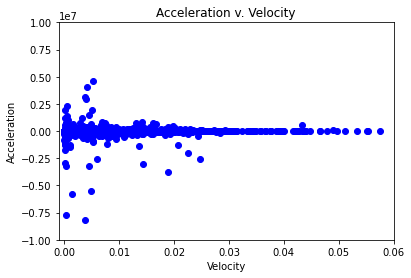

In [74]:
plt.scatter(sac_velo,sac_accel, c = 'blue')
plt.ylim(-10000000,10000000)
plt.xlim(-0.001,0.06)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Sac")
plt.show()

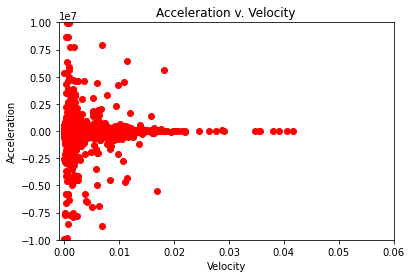

In [75]:
plt.scatter(fix_velo,fix_accel, c = 'red')
plt.ylim(-10000000,10000000)
plt.xlim(-0.001,0.06)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Fix")
plt.show()